# Goal

The project is to predict whether or not the user is going to repay the loan.

# Challenge Description



We have access to a specific bank loan data. We have data about all loans asked to the bank,
whether the bank decided to grant it and, finally, whether the borrower managed to repay it. We
also have info about the borrower at the moment she is asking for the loan.

We have to come up with a better strategy to grant loans. 
Specifically we should:

1)Build a model which is better than the bank model.

For simplicity, assume that:
If you grant the loan and the it doesn't get repaid, you lose 1

If you grant the loan and the it does get repaid, you gain 1

If you don't grant the loan, you gain 0

2)Using the rules above, compare bank profitability vs your model profitabilit

3)Describe the impact of the most important variables on the prediction. Also, focus on the
variable "is_employed", which describes whether the borrower is employed when she
asks for the loan. How does this variable impact the model? Explain why?

4)Are there any other variables, not in the data provided, that you'd have liked to include in
the model?


# Data

### "loan_table" - general information about the loan

Columns:
    
loan_id:  the id of the loan. Unique by loan. Can be joined to loan id in the other table
    
loan_purpose: the reason for asking the loan: investment, business, emergency_funds,home, other.
        
date: when the loan was asked 
    
loan_granted: whether the loan was granted 
    
loan_repaid:whether the loan was repaid. NA means that the loan was not granted

    

### borrower_table" - information about the borrower


loan_id :  the id of the the loan. Unique by loan. Can be joined to loan id in the other table

is_first_loan :  did she ask for any other loans in her lifetime?

fully_repaid_previous_loans : did she pay on time all of her previous loans? If this is the first loan, it is NA
(1 represents pay on time; 0 represents that the user did not pay on time, na represents the first time)
                               
currently_repaying_other_loans : is she currently repaying any other loans? 
                               If this is the first loan, it is NA
          (1 represents that the user is repaying other loan; 0 represents that the user the user is not repaying other loan, na represents the first time)
                               
total_credit_card_limit : total credit card monthly limit

avg_percentage_credit_card_limit_used_last_year: on an average, how much did she use of her credit card limit in the previous 12 months. This number can be >1 since it is possible to go above the credit card limit

saving_amount : total saving account balance when she asked for the loan

checking_amount : total checking account balance when she asked for the loan

is_employed : whether she is employed (1) or not (0)

yearly_salary : how much she earned in the previous year

age :her age

dependent_number : number of people she claims as dependent

# Data Processing

In [1]:
import pandas as pd
import numpy as np
import re
loan=pd.read_csv('loan_table.csv')
loan.head()   #5rows

,loan_id,loan_purpose,date,loan_granted,loan_repaid
0,19454,investment,3/15/2012,0,NaN
1,496811,investment,1/17/2012,0,NaN
2,929493,other,2/9/2012,0,NaN
3,580653,other,6/27/2012,1,1.0
4,172419,business,5/21/2012,1,0.0


In [2]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101100 entries, 0 to 101099
Data columns (total 5 columns):
loan_id         101100 non-null int64
loan_purpose    101100 non-null object
date            101100 non-null object
loan_granted    101100 non-null int64
loan_repaid     47654 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 3.9+ MB


In [3]:
borrower=pd.read_csv('borrower_table.csv')
borrower.head()   #5rows

,loan_id,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number
0,289774,1,NaN,NaN,8000,0.49,3285,1073,0,0,47,3
1,482590,0,1.0,0.0,4500,1.03,636,5299,1,13500,33,1
2,135565,1,NaN,NaN,6900,0.82,2085,3422,1,24500,38,8
3,207797,0,1.0,0.0,1200,0.82,358,3388,0,0,24,1
4,828078,0,0.0,0.0,6900,0.80,2138,4282,1,18100,36,1


In [4]:
borrower.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101100 entries, 0 to 101099
Data columns (total 12 columns):
loan_id                                            101100 non-null int64
is_first_loan                                      101100 non-null int64
fully_repaid_previous_loans                        46153 non-null float64
currently_repaying_other_loans                     46153 non-null float64
total_credit_card_limit                            101100 non-null int64
avg_percentage_credit_card_limit_used_last_year    94128 non-null float64
saving_amount                                      101100 non-null int64
checking_amount                                    101100 non-null int64
is_employed                                        101100 non-null int64
yearly_salary                                      101100 non-null int64
age                                                101100 non-null int64
dependent_number                                   101100 non-null int64
dtypes: fl

In [5]:
#result = pd.merge(left, right, on='key'), by default,how='inner'
loanborrower=pd.merge(loan,borrower,on='loan_id')
loanborrower.head()

,loan_id,loan_purpose,date,loan_granted,loan_repaid,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number
0,19454,investment,3/15/2012,0,NaN,1,NaN,NaN,8600,0.79,1491,6285,1,45200,42,7
1,496811,investment,1/17/2012,0,NaN,1,NaN,NaN,5300,0.52,141,5793,0,0,42,5
2,929493,other,2/9/2012,0,NaN,1,NaN,NaN,0,NaN,660,3232,1,26500,60,4
3,580653,other,6/27/2012,1,1.0,0,1.0,0.0,5400,0.52,3345,2764,1,15800,58,4
4,172419,business,5/21/2012,1,0.0,1,NaN,NaN,2900,0.76,1050,3695,1,34800,31,4


In [6]:
loanborrower.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101100 entries, 0 to 101099
Data columns (total 16 columns):
loan_id                                            101100 non-null int64
loan_purpose                                       101100 non-null object
date                                               101100 non-null object
loan_granted                                       101100 non-null int64
loan_repaid                                        47654 non-null float64
is_first_loan                                      101100 non-null int64
fully_repaid_previous_loans                        46153 non-null float64
currently_repaying_other_loans                     46153 non-null float64
total_credit_card_limit                            101100 non-null int64
avg_percentage_credit_card_limit_used_last_year    94128 non-null float64
saving_amount                                      101100 non-null int64
checking_amount                                    101100 non-null int64
is_empl

In [7]:
# choose data with loan granted 
# because our goal is  to predict whether or not the user is going to repay the loan
#  loanborrower['loan_granted'] == 1 returns true or false
loanborrower = loanborrower[loanborrower['loan_granted'] == 1]
loanborrower.head()

,loan_id,loan_purpose,date,loan_granted,loan_repaid,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number
3,580653,other,6/27/2012,1,1.0,0,1.0,0.0,5400,0.52,3345,2764,1,15800,58,4
4,172419,business,5/21/2012,1,0.0,1,NaN,NaN,2900,0.76,1050,3695,1,34800,31,4
6,780070,business,3/14/2012,1,1.0,0,1.0,0.0,7800,0.30,4206,4368,1,51100,51,2
7,303138,emergency_funds,8/31/2012,1,0.0,0,0.0,1.0,4300,1.02,886,1597,1,15000,59,2
8,91475,investment,5/25/2012,1,1.0,0,1.0,0.0,3900,0.65,1837,3795,1,12000,24,1


In [8]:
# drop useless features
loanborrower = loanborrower.drop(labels=['loan_id','date','loan_granted'], axis=1, inplace=False)

In [9]:
loanborrower.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47654 entries, 3 to 101098
Data columns (total 13 columns):
loan_purpose                                       47654 non-null object
loan_repaid                                        47654 non-null float64
is_first_loan                                      47654 non-null int64
fully_repaid_previous_loans                        21865 non-null float64
currently_repaying_other_loans                     21865 non-null float64
total_credit_card_limit                            47654 non-null int64
avg_percentage_credit_card_limit_used_last_year    46751 non-null float64
saving_amount                                      47654 non-null int64
checking_amount                                    47654 non-null int64
is_employed                                        47654 non-null int64
yearly_salary                                      47654 non-null int64
age                                                47654 non-null int64
dependent_number 

In [10]:
loanborrower.describe()

,loan_repaid,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number
count,47654.000000,47654.000000,21865.000000,21865.000000,47654.000000,46751.000000,47654.000000,47654.000000,47654.000000,47654.000000,47654.000000,47654.000000
mean,0.644353,0.541172,0.902493,0.297736,4527.848659,0.700091,2022.366580,3499.160595,0.909829,29245.991942,41.524657,3.752445
std,0.478714,0.498307,0.296654,0.457273,1975.127016,0.177729,1493.410303,2155.128304,0.286429,16286.512395,12.817587,2.621351
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,3100.000000,0.580000,914.000000,1873.000000,1.000000,18900.000000,32.000000,2.000000
50%,1.000000,1.000000,1.000000,0.000000,4400.000000,0.710000,1553.000000,3024.500000,1.000000,29400.000000,41.000000,3.000000
75%,1.000000,1.000000,1.000000,1.000000,5800.000000,0.830000,2878.000000,4842.000000,1.000000,40200.000000,50.000000,6.000000
max,1.000000,1.000000,1.000000,1.000000,13500.000000,1.090000,10641.000000,13165.000000,1.000000,97200.000000,79.000000,8.000000


# Visualization

In [11]:
#seaborn: statistical data visualization
import seaborn as sns
import matplotlib.pyplot as plt

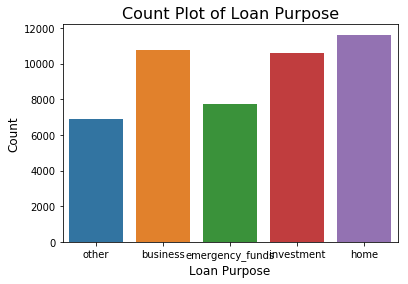

In [12]:
axx=sns.countplot(x='loan_purpose', data=loanborrower)
axx.set_xlabel('Loan Purpose', fontsize=12)
axx.set_ylabel('Count', fontsize=12)
axx.set_title('Count Plot of Loan Purpose', fontsize=16)
plt.show()

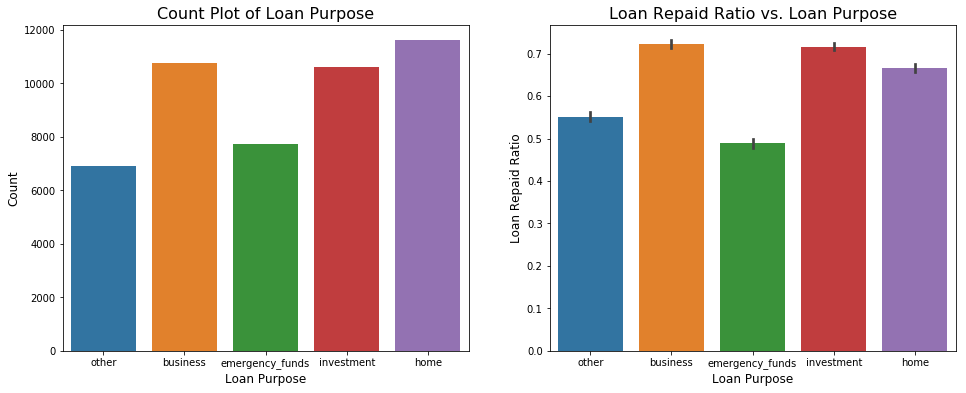

In [13]:
# visualization of 'loan_purpose'
#categorical variable 
## Initialize Figure and Axes object, make use of the plt.subplots() function to which you pass the figsize argument.
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.countplot(x='loan_purpose', data=loanborrower, ax=ax[0])
ax[0].set_xlabel('Loan Purpose', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)
ax[0].set_title('Count Plot of Loan Purpose', fontsize=16)

sns.barplot(x='loan_purpose', y='loan_repaid', data=loanborrower, ax=ax[1])
ax[1].set_xlabel('Loan Purpose', fontsize=12)
ax[1].set_ylabel('Loan Repaid Ratio', fontsize=12)
ax[1].set_title('Loan Repaid Ratio vs. Loan Purpose', fontsize=16)
#plt.tight_layout()
plt.show()

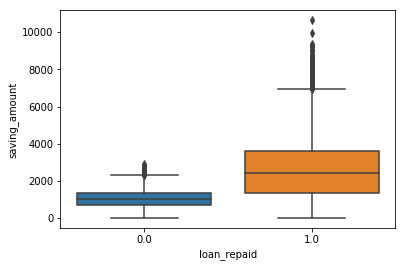

In [14]:
sns.boxplot(x='loan_repaid', y='saving_amount',data=loanborrower)
plt.show()

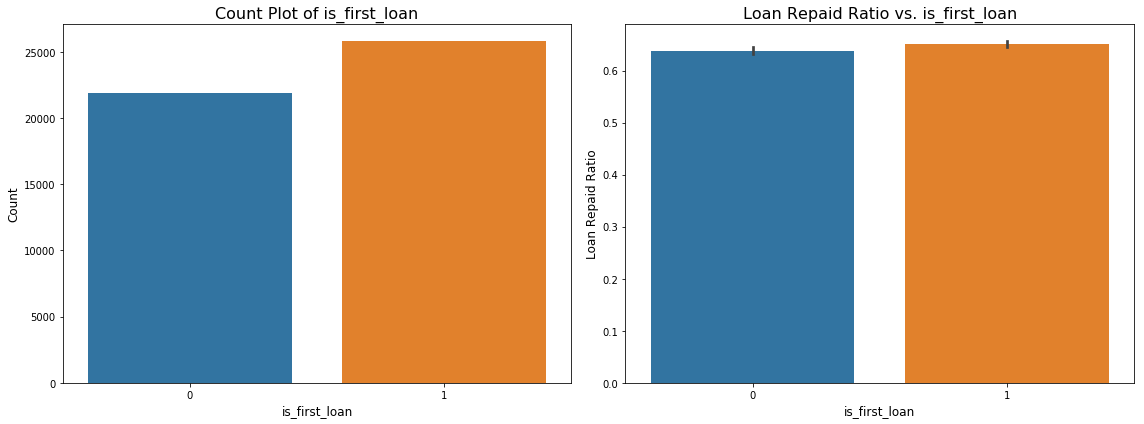

In [15]:
# visualization of 'is_first_loan'
#categorical variable 
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.countplot(x='is_first_loan', data=loanborrower, ax=ax[0])
ax[0].set_xlabel('is_first_loan', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)
ax[0].set_title('Count Plot of is_first_loan', fontsize=16)

sns.barplot(x='is_first_loan', y='loan_repaid', data=loanborrower, ax=ax[1])
ax[1].set_xlabel('is_first_loan', fontsize=12)
ax[1].set_ylabel('Loan Repaid Ratio', fontsize=12)
ax[1].set_title('Loan Repaid Ratio vs. is_first_loan', fontsize=16)
plt.tight_layout()
plt.show()


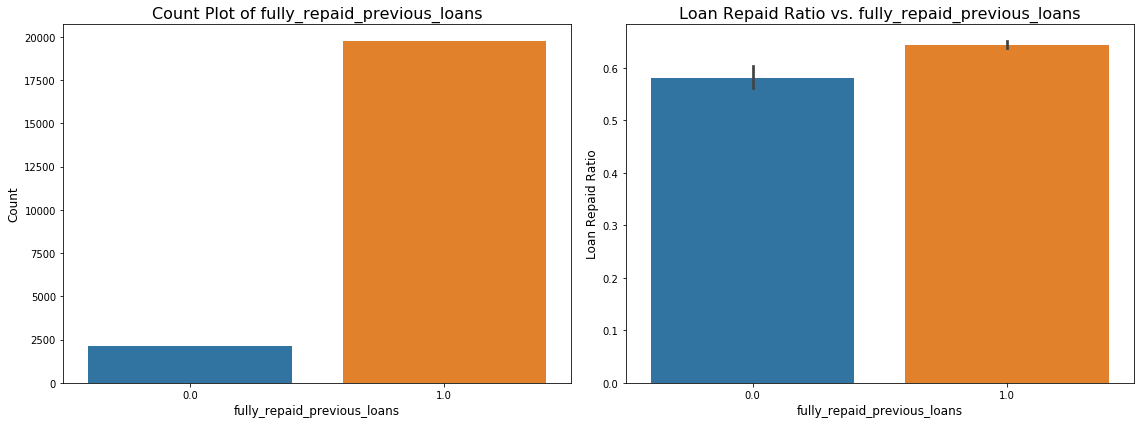

In [16]:
# visualization of 'fully_repaid_previous_loans'
#categorical variable 
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.countplot(x='fully_repaid_previous_loans', data=loanborrower, ax=ax[0])
ax[0].set_xlabel('fully_repaid_previous_loans', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)
ax[0].set_title('Count Plot of fully_repaid_previous_loans', fontsize=16)

sns.barplot(x='fully_repaid_previous_loans', y='loan_repaid', data=loanborrower, ax=ax[1])
ax[1].set_xlabel('fully_repaid_previous_loans', fontsize=12)
ax[1].set_ylabel('Loan Repaid Ratio', fontsize=12)
ax[1].set_title('Loan Repaid Ratio vs. fully_repaid_previous_loans', fontsize=16)
plt.tight_layout()
plt.show()

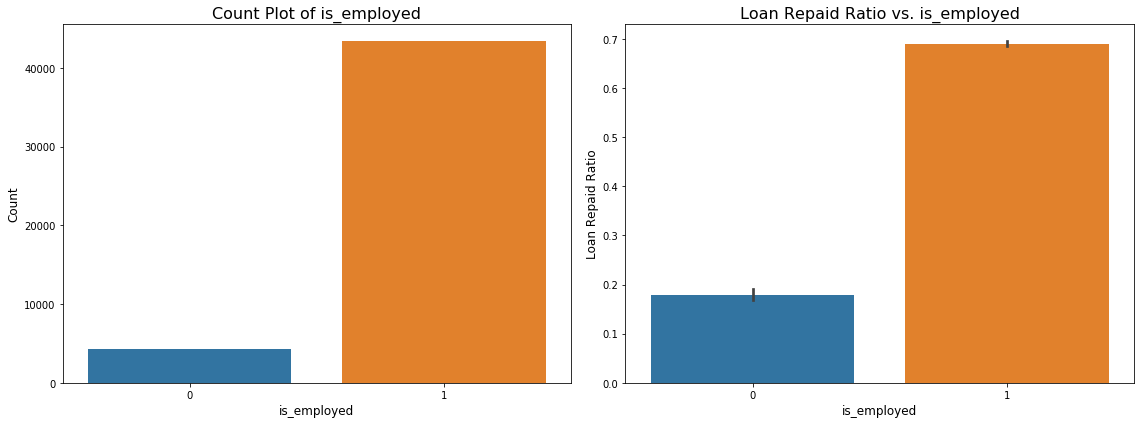

In [17]:
# visualization of 'is_employed'
#categorical variable 
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.countplot(x='is_employed', data=loanborrower, ax=ax[0])
ax[0].set_xlabel('is_employed', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)
ax[0].set_title('Count Plot of is_employed', fontsize=16)

sns.barplot(x='is_employed', y='loan_repaid', data=loanborrower, ax=ax[1])
ax[1].set_xlabel('is_employed', fontsize=12)
ax[1].set_ylabel('Loan Repaid Ratio', fontsize=12)
ax[1].set_title('Loan Repaid Ratio vs. is_employed', fontsize=16)
plt.tight_layout()
plt.show()

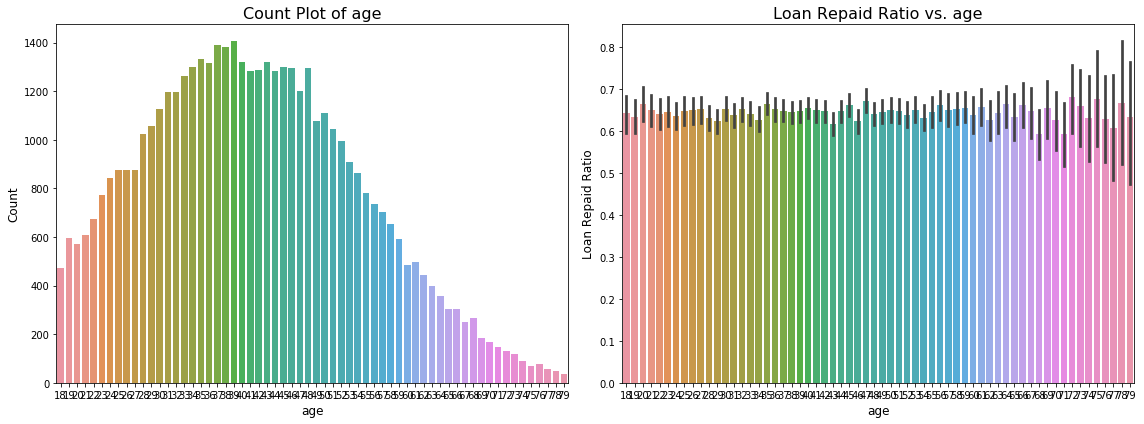

In [18]:
# visualization of 'age'
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.countplot(x='age', data=loanborrower, ax=ax[0])
ax[0].set_xlabel('age', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)
ax[0].set_title('Count Plot of age', fontsize=16)

sns.barplot(x='age', y='loan_repaid', data=loanborrower, ax=ax[1])
ax[1].set_xlabel('age', fontsize=12)
ax[1].set_ylabel('Loan Repaid Ratio', fontsize=12)
ax[1].set_title('Loan Repaid Ratio vs. age', fontsize=16)
plt.tight_layout()
plt.show()

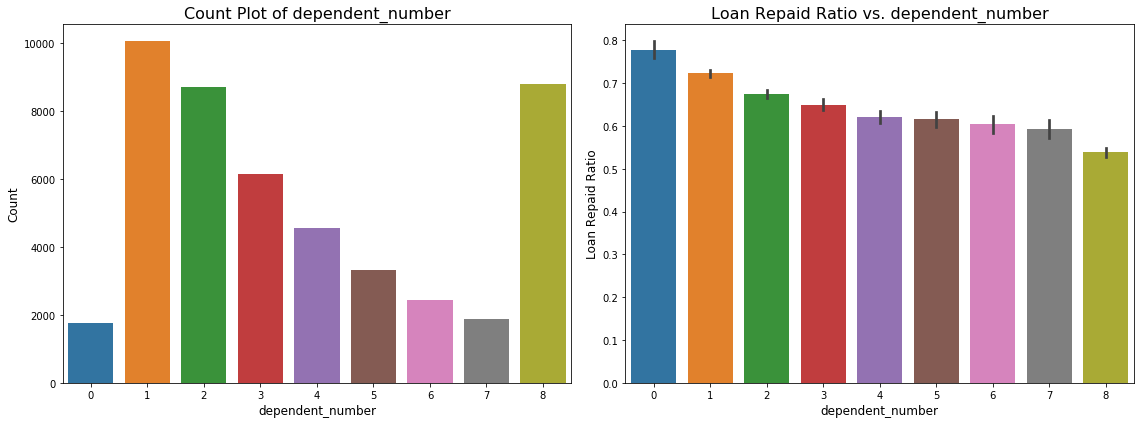

In [19]:
# visualization of 'age'
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.countplot(x='dependent_number', data=loanborrower, ax=ax[0])
ax[0].set_xlabel('dependent_number', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)
ax[0].set_title('Count Plot of dependent_number', fontsize=16)

sns.barplot(x='dependent_number', y='loan_repaid', data=loanborrower, ax=ax[1])
ax[1].set_xlabel('dependent_number', fontsize=12)
ax[1].set_ylabel('Loan Repaid Ratio', fontsize=12)
ax[1].set_title('Loan Repaid Ratio vs. dependent_number', fontsize=16)
plt.tight_layout()
plt.show()

In [20]:
grouped = loanborrower[['total_credit_card_limit', 'loan_repaid']].groupby('total_credit_card_limit')
grouped.head()

,total_credit_card_limit,loan_repaid
3,5400,1.0
4,2900,0.0
6,7800,1.0
7,4300,0.0
8,3900,1.0
15,6100,0.0
18,3200,0.0
22,4600,1.0
23,10100,1.0
25,4100,1.0


In [21]:
loanborrower1=loanborrower[['total_credit_card_limit', 'loan_repaid']].groupby('total_credit_card_limit').agg({'loan_repaid':[np.mean]}).reset_index()
loanborrower1[:10]

,total_credit_card_limit,loan_repaid
,,mean
0,0,0.172757
1,500,0.000000
2,600,0.000000
3,700,0.000000
4,800,0.000000
5,900,0.000000
6,1000,0.263514
7,1100,0.296970
8,1200,0.325843


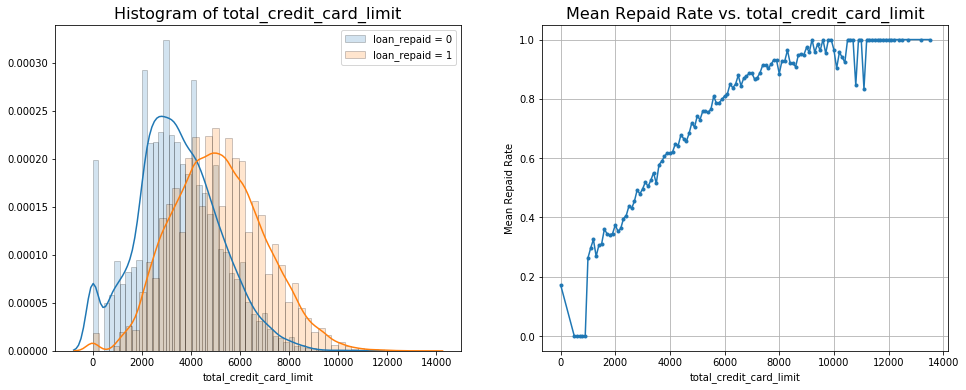

In [22]:
# Visualization of 'total_credit_card_limit'
loanborrower1=loanborrower[['total_credit_card_limit', 'loan_repaid']].groupby('total_credit_card_limit').agg({'loan_repaid':[np.mean]}).reset_index()

hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}
#warnings.filterwarnings('ignore')

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.distplot(loanborrower[loanborrower['loan_repaid'] == 0]['total_credit_card_limit'], 
             label='loan_repaid = 0', ax=ax[0], hist_kws=hist_kws)
sns.distplot(loanborrower[loanborrower['loan_repaid'] == 1]['total_credit_card_limit'], 
             label='loan_repaid = 1', ax=ax[0], hist_kws=hist_kws)
ax[0].set_title('Histogram of total_credit_card_limit', fontsize=16)
ax[0].legend()
ax[1].plot(loanborrower1['total_credit_card_limit'],loanborrower1['loan_repaid'], '.-')
ax[1].set_title('Mean Repaid Rate vs. total_credit_card_limit', fontsize=16)
ax[1].set_xlabel('total_credit_card_limit')
ax[1].set_ylabel('Mean Repaid Rate')
ax[1].grid(True)
plt.show()

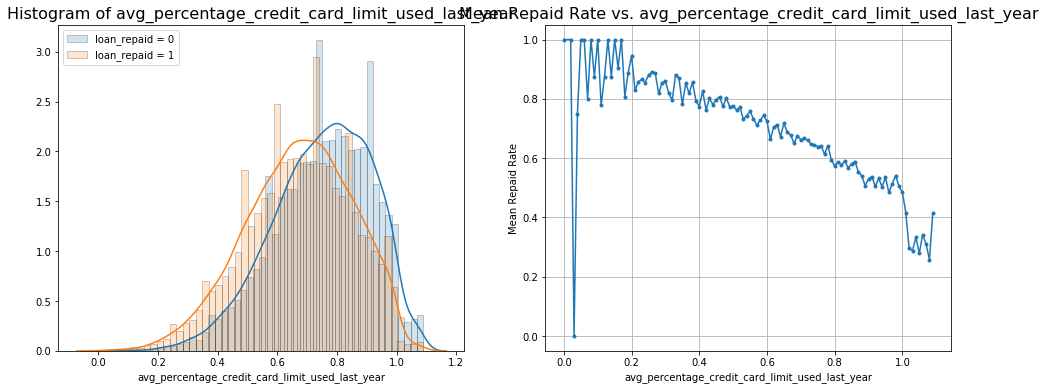

In [23]:
# Visualization of 'avg_percentage_credit_card_limit_used_last_year'
not_null = loanborrower[~loanborrower['avg_percentage_credit_card_limit_used_last_year'].isnull()]
grouped = not_null.groupby('avg_percentage_credit_card_limit_used_last_year')
mean = grouped.mean().reset_index()
hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.distplot(not_null[not_null['loan_repaid'] == 0]['avg_percentage_credit_card_limit_used_last_year'], 
             label='loan_repaid = 0', ax=ax[0], hist_kws=hist_kws)
sns.distplot(not_null[not_null['loan_repaid'] == 1]['avg_percentage_credit_card_limit_used_last_year'], 
             label='loan_repaid = 1', ax=ax[0], hist_kws=hist_kws)
ax[0].set_title('Histogram of avg_percentage_credit_card_limit_used_last_year', fontsize=16)
ax[0].legend()
ax[1].plot(mean['avg_percentage_credit_card_limit_used_last_year'], mean['loan_repaid'], '.-')
ax[1].set_title('Mean Repaid Rate vs. avg_percentage_credit_card_limit_used_last_year', fontsize=16)
ax[1].set_xlabel('avg_percentage_credit_card_limit_used_last_year')
ax[1].set_ylabel('Mean Repaid Rate')
ax[1].grid(True)
plt.show()

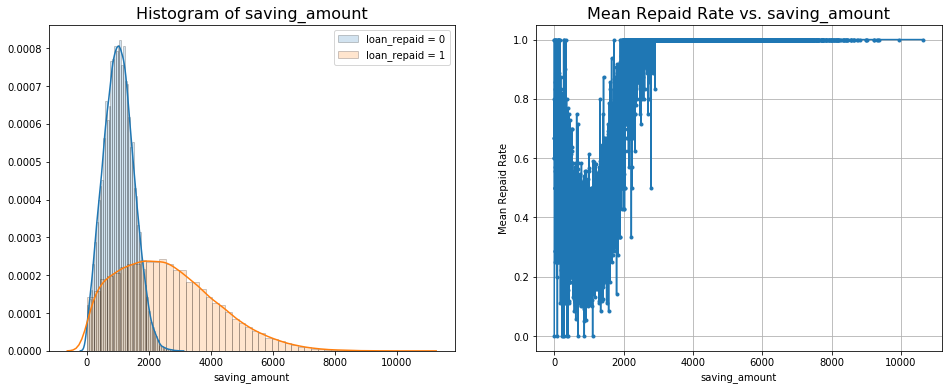

In [24]:

# Visualization of 'saving_amount'
grouped =loanborrower[['saving_amount', 'loan_repaid']].groupby('saving_amount')
mean = grouped.mean().reset_index()
hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.distplot(loanborrower[loanborrower['loan_repaid'] == 0]['saving_amount'], 
             label='loan_repaid = 0', ax=ax[0], hist_kws=hist_kws)
sns.distplot( loanborrower[ loanborrower['loan_repaid'] == 1]['saving_amount'], 
             label='loan_repaid = 1', ax=ax[0], hist_kws=hist_kws)
ax[0].set_title('Histogram of saving_amount', fontsize=16)
ax[0].legend()
ax[1].plot(mean['saving_amount'], mean['loan_repaid'], '.-')
ax[1].set_title('Mean Repaid Rate vs. saving_amount', fontsize=16)
ax[1].set_xlabel('saving_amount')
ax[1].set_ylabel('Mean Repaid Rate')
ax[1].grid(True)
plt.show()

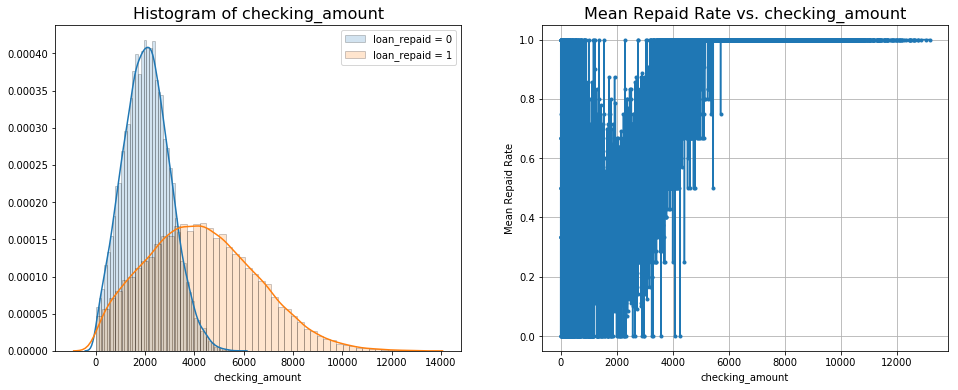

In [25]:
# Visualization of 'checking_amount'
grouped = loanborrower[['checking_amount', 'loan_repaid']].groupby('checking_amount')
mean = grouped.mean().reset_index()
hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.distplot(loanborrower[loanborrower['loan_repaid'] == 0]['checking_amount'], 
             label='loan_repaid = 0', ax=ax[0], hist_kws=hist_kws)
sns.distplot(loanborrower[loanborrower['loan_repaid'] == 1]['checking_amount'], 
             label='loan_repaid = 1', ax=ax[0], hist_kws=hist_kws)
ax[0].set_title('Histogram of checking_amount', fontsize=16)
ax[0].legend()
ax[1].plot(mean['checking_amount'], mean['loan_repaid'], '.-')
ax[1].set_title('Mean Repaid Rate vs. checking_amount', fontsize=16)
ax[1].set_xlabel('checking_amount')
ax[1].set_ylabel('Mean Repaid Rate')
ax[1].grid(True)
plt.show()

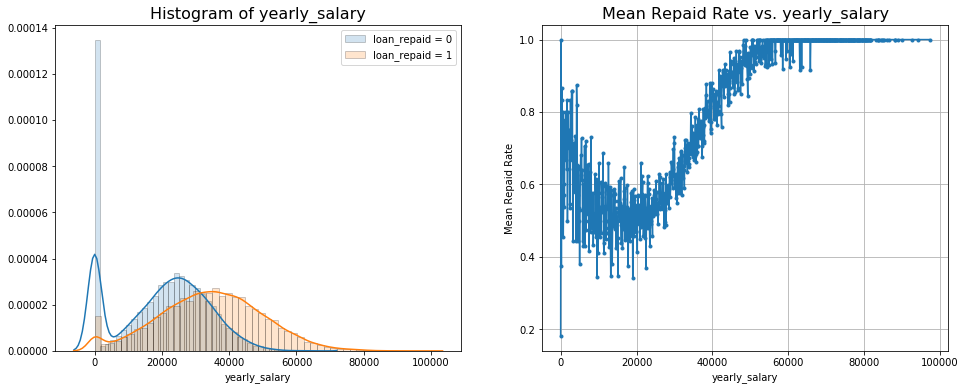

In [26]:
# Visualization of 'yearly_salary'
grouped = loanborrower[['yearly_salary', 'loan_repaid']].groupby('yearly_salary')
mean = grouped.mean().reset_index()
hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.distplot(loanborrower[loanborrower['loan_repaid'] == 0]['yearly_salary'], 
             label='loan_repaid = 0', ax=ax[0], hist_kws=hist_kws)
sns.distplot(loanborrower[loanborrower['loan_repaid'] == 1]['yearly_salary'], 
             label='loan_repaid = 1', ax=ax[0], hist_kws=hist_kws)
ax[0].set_title('Histogram of yearly_salary', fontsize=16)
ax[0].legend()
ax[1].plot(mean['yearly_salary'], mean['loan_repaid'], '.-')
ax[1].set_title('Mean Repaid Rate vs. yearly_salary', fontsize=16)
ax[1].set_xlabel('yearly_salary')
ax[1].set_ylabel('Mean Repaid Rate')
ax[1].grid(True)
plt.show()

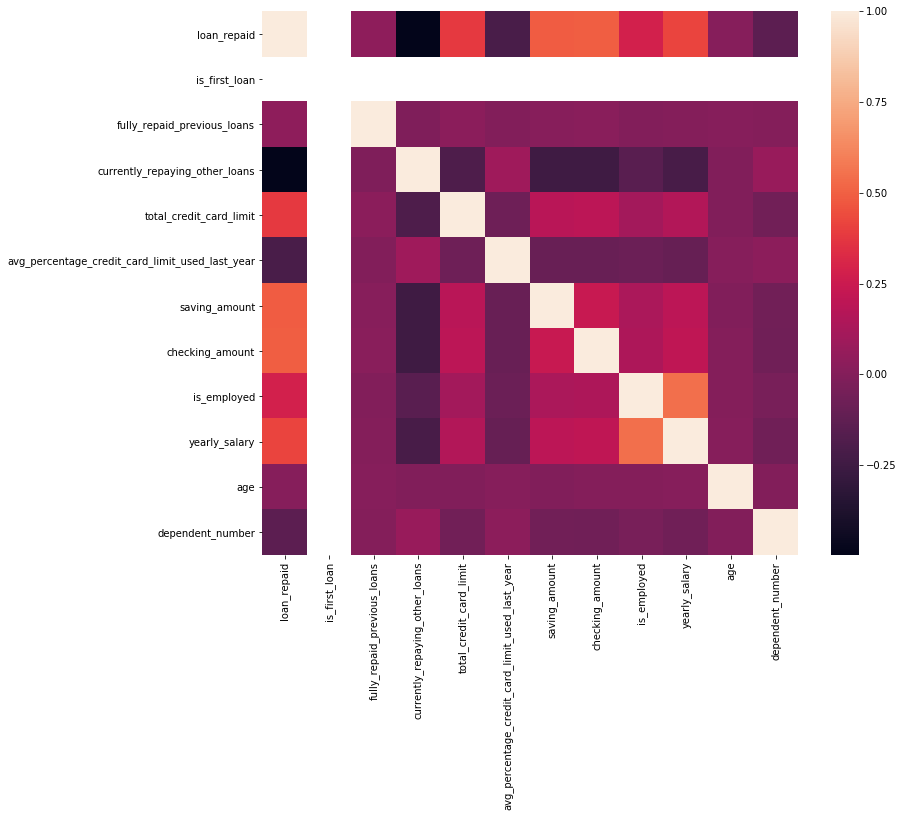

In [27]:
# feature correlation
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(loanborrower.dropna(axis=0, how='any').corr(), ax=ax)
plt.show()

In [28]:
# there is a clear connection between 'is_first_loan' 
# and 'fully_repaid_previous_loans', 'currently_repaying_other_loans'
print(loanborrower[loanborrower['is_first_loan'] == 1]['fully_repaid_previous_loans'].unique())
print(loanborrower[loanborrower['is_first_loan'] == 1]['currently_repaying_other_loans'].unique())

[nan]
[nan]


In [29]:
# fill missing values with -1 for 'fully_repaid_previous_loans' and 'currently_repaying_other_loans'
loanborrower2= loanborrower.fillna({'fully_repaid_previous_loans': -1, 'currently_repaying_other_loans': -1})

In [30]:
# fill missing values with median
median =loanborrower2['avg_percentage_credit_card_limit_used_last_year'].median()
loanborrower2 =loanborrower2.fillna({'avg_percentage_credit_card_limit_used_last_year': median})

In [31]:
loanborrower2.head()

,loan_purpose,loan_repaid,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number
3,other,1.0,0,1.0,0.0,5400,0.52,3345,2764,1,15800,58,4
4,business,0.0,1,-1.0,-1.0,2900,0.76,1050,3695,1,34800,31,4
6,business,1.0,0,1.0,0.0,7800,0.30,4206,4368,1,51100,51,2
7,emergency_funds,0.0,0,0.0,1.0,4300,1.02,886,1597,1,15000,59,2
8,investment,1.0,0,1.0,0.0,3900,0.65,1837,3795,1,12000,24,1


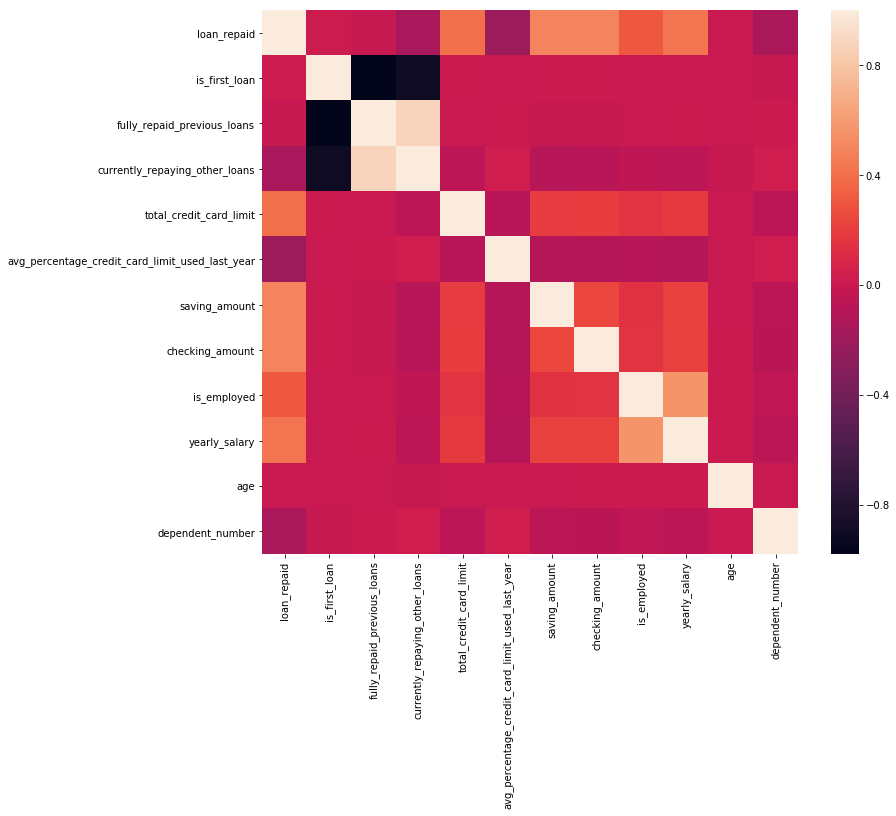

In [32]:
# feature correlation
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(loanborrower2.corr(), ax=ax)
plt.show()

# Machine Learning

Here, I will try to implement the Random forest.

#### get dummies

In [89]:
loanborrower2.head()

,loan_purpose,loan_repaid,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number
3,other,1.0,0,1.0,0.0,5400,0.52,3345,2764,1,15800,58,4
4,business,0.0,1,-1.0,-1.0,2900,0.76,1050,3695,1,34800,31,4
6,business,1.0,0,1.0,0.0,7800,0.30,4206,4368,1,51100,51,2
7,emergency_funds,0.0,0,0.0,1.0,4300,1.02,886,1597,1,15000,59,2
8,investment,1.0,0,1.0,0.0,3900,0.65,1837,3795,1,12000,24,1


In [90]:
import numpy as np
# Import train_test_split function
from sklearn.model_selection import train_test_split

X=loanborrower2
#[['is_first_loan', 'currently_repaying_other_loans','fully_repaid_previous_loans',  
           #'total_credit_card_limit','avg_percentage_credit_card_limit_used_last_year','saving_amount','checking_amount', 
          #'is_employed','yearly_salary','age','dependent_number','loan_purpose']]
 # Features
y=loanborrower2['loan_repaid'].to_frame()  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
#train=concat(X_train,y_train)

In [91]:
# Split dataset into training set and test set
df_train, df_test = train_test_split(X, test_size=0.25)
#train=concat(X_train,y_train)

In [36]:
print("Number transactions X_train dataset: ", df_train.shape)
print("Number transactions y_train dataset: ", df_train.shape)
print("Number transactions X_test dataset: ", df_test.shape)
print("Number transactions y_test dataset: ", df_test.shape)

Number transactions X_train dataset:  (35740, 13)
Number transactions y_train dataset:  (35740, 13)
Number transactions X_test dataset:  (11914, 13)
Number transactions y_test dataset:  (11914, 13)


In [92]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (35740, 13)
Number transactions y_train dataset:  (35740, 1)
Number transactions X_test dataset:  (11914, 13)
Number transactions y_test dataset:  (11914, 1)


In [38]:
#train.head(3)

In [93]:
# Class count
#count_class_0, count_class_1 = df_train.loan_repaid.value_counts()

# Divide by class
df_class_0 = df_train[df_train['loan_repaid'] == 0.0]
df_class_1 = df_train[df_train['loan_repaid'] == 1.0]

In [94]:
type(df_class_0)

pandas.core.frame.DataFrame

In [95]:
df_class_0.head(3)

,loan_purpose,loan_repaid,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number
10455,investment,0.0,0,1.0,1.0,5100,0.69,1914,3175,1,18300,48,4
5683,home,0.0,0,1.0,1.0,2600,0.53,68,2594,1,35700,47,3
1808,business,0.0,1,-1.0,-1.0,3500,0.72,1192,1727,1,8100,42,8


In [42]:
df_class_0.count()

loan_purpose                                       12785
loan_repaid                                        12785
is_first_loan                                      12785
fully_repaid_previous_loans                        12785
currently_repaying_other_loans                     12785
total_credit_card_limit                            12785
avg_percentage_credit_card_limit_used_last_year    12785
saving_amount                                      12785
checking_amount                                    12785
is_employed                                        12785
yearly_salary                                      12785
age                                                12785
dependent_number                                   12785
dtype: int64

In [43]:
print("Number of class0: ", df_class_0.loan_repaid.count())
print("Number of class1: ", df_class_1.loan_repaid.count())

Number of class0:  12785
Number of class1:  22955


In [45]:
count_class_0

NameError: name 'count_class_0' is not defined

In [ ]:
count_class_1

In [ ]:
type(count_class_1)

In [59]:
df_classss = df_class_0.sample(10)
print(df_classss.count())

loan_purpose                                       10
loan_repaid                                        10
is_first_loan                                      10
fully_repaid_previous_loans                        10
currently_repaying_other_loans                     10
total_credit_card_limit                            10
avg_percentage_credit_card_limit_used_last_year    10
saving_amount                                      10
checking_amount                                    10
is_employed                                        10
yearly_salary                                      10
age                                                10
dependent_number                                   10
dtype: int64


# undersampling random:

In [71]:
df_class_1_under = df_class_1.sample(df_class_0.loan_repaid.count())
print(df_class_1_under.loan_repaid.count())

12667


In [72]:
df_test_under = pd.concat([df_class_1_under, df_class_0], axis=0)
print(df_class_0.loan_repaid.count())

print(df_test_under.loan_repaid.count())


12667
25334


In [76]:
print('Random under-sampling:')
print(df_test_under.loan_repaid.value_counts())


Random under-sampling:
0.0    12667
1.0    12667
Name: loan_repaid, dtype: int64


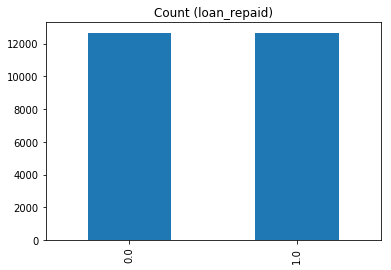

In [77]:
df_test_under.loan_repaid.value_counts().plot(kind='bar', title='Count (loan_repaid)');
plt.show()

In [82]:
#get dummies
df_test_undergetdummy=df_test_under
dummiesunder=pd.get_dummies(df_test_undergetdummy.loan_purpose)
dummiesunder.head()

,business,emergency_funds,home,investment,other
85295,0,0,0,1,0
68122,1,0,0,0,0
17145,0,1,0,0,0
9654,0,0,0,0,1
2281,0,1,0,0,0


In [86]:
df_testtest_undergetdummy=df_test
dummiesundert=pd.get_dummies(df_testtest_undergetdummy.loan_purpose)
dummiesundert.head()

,business,emergency_funds,home,investment,other
64258,0,0,1,0,0
38284,0,0,1,0,0
78030,0,1,0,0,0
71120,0,0,0,1,0
60188,0,0,0,1,0


In [89]:
undercombinedummy=pd.concat([df_test_undergetdummy,dummiesunder],axis='columns')
undercombinedummy.head()
undercombinedummyt=pd.concat([df_testtest_undergetdummy,dummiesundert],axis='columns')
undercombinedummyt.head()

,loan_purpose,loan_repaid,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number,business,emergency_funds,home,investment,other
64258,home,0.0,1,-1.0,-1.0,3000,0.96,1179,1837,1,40400,24,5,0,0,1,0,0
38284,home,1.0,1,-1.0,-1.0,4800,0.47,1332,4294,1,31600,50,3,0,0,1,0,0
78030,emergency_funds,0.0,1,-1.0,-1.0,3600,0.65,40,1233,1,24900,37,7,0,1,0,0,0
71120,investment,1.0,1,-1.0,-1.0,5600,0.54,5234,4308,1,43400,40,4,0,0,0,1,0
60188,investment,1.0,1,-1.0,-1.0,5400,0.73,3571,4321,1,46900,46,2,0,0,0,1,0


In [90]:
#you can drop any dummies varible, because we just need n-1 dummies variables.
finalundersamplingdummy=undercombinedummy.drop(['loan_purpose','other'],axis='columns')
finalundersamplingdummy.head()
finalundersamplingdummyt=undercombinedummyt.drop(['loan_purpose','other'],axis='columns')
finalundersamplingdummyt.head()

,loan_repaid,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number,business,emergency_funds,home,investment
64258,0.0,1,-1.0,-1.0,3000,0.96,1179,1837,1,40400,24,5,0,0,1,0
38284,1.0,1,-1.0,-1.0,4800,0.47,1332,4294,1,31600,50,3,0,0,1,0
78030,0.0,1,-1.0,-1.0,3600,0.65,40,1233,1,24900,37,7,0,1,0,0
71120,1.0,1,-1.0,-1.0,5600,0.54,5234,4308,1,43400,40,4,0,0,0,1
60188,1.0,1,-1.0,-1.0,5400,0.73,3571,4321,1,46900,46,2,0,0,0,1


In [92]:
Xunder_train=finalundersamplingdummy[['is_first_loan', 'currently_repaying_other_loans','fully_repaid_previous_loans',  
           'total_credit_card_limit','avg_percentage_credit_card_limit_used_last_year','saving_amount','checking_amount', 
          'is_employed','yearly_salary','age','dependent_number','business','emergency_funds','home','investment']]
 # Features
yunder_train=finalundersamplingdummy['loan_repaid'] 
Xunder_test=finalundersamplingdummyt[['is_first_loan', 'currently_repaying_other_loans','fully_repaid_previous_loans',  
           'total_credit_card_limit','avg_percentage_credit_card_limit_used_last_year','saving_amount','checking_amount', 
          'is_employed','yearly_salary','age','dependent_number','business','emergency_funds','home','investment']]
 # Features
yunder_test=finalundersamplingdummyt['loan_repaid'] 

# Find best parameters using GridSearchCV and fit the model


In [94]:
%matplotlib inline
import numpy as np
import pandas as pd
#import visuals as vs
#from lime import lime_tabular
#import shap

from sklearn.utils import shuffle, class_weight
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
import seaborn as sns

random_state = 6
np.random.seed(random_state)

In [95]:
#Use Ensemble Cross-Validation (CV):
from sklearn.model_selection import *
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=random_state)
rfc = RandomForestClassifier(criterion='entropy', random_state = random_state, class_weight='balanced')
params = {
    'n_estimators': [10, 20, 50, 100],
    'max_depth': [3, 4, 5, 7, 10],
    'min_samples_split': [40, 50, 60, 70]
}

grid_clf = GridSearchCV(estimator = rfc, param_grid = params, scoring = 'accuracy', cv = cv)

# we have to find out best optimized parameters
grid_clf.fit(Xunder_train, yunder_train.astype(int))

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=6, shuffle=True),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=6,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 20, 50, 100], 'max_depth': [3, 4, 5, 7, 10], 'min_samples_split': [40, 50, 60, 70]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

# Print the best parameters and model estimator

In [96]:
# get the best model
print('\n # Best estimator ---------\n{}'.format(grid_clf.best_estimator_))

# Get the best parameters
print('\n # Best parameters ---------\n{}'.format(grid_clf.best_params_))

# best score
print('\n # Best score ---------\n{}'.format(grid_clf.best_score_))


 # Best estimator ---------
RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=10, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=40, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=6,
            verbose=0, warm_start=False)

 # Best parameters ---------
{'max_depth': 10, 'min_samples_split': 40, 'n_estimators': 100}

 # Best score ---------
0.9229099234230678


# Prediction on the estimator with the best found parameters.


In [97]:
ypredunder = grid_clf.predict(Xunder_test)

In [98]:
print('The accuracy of the model is {}'.format(accuracy_score(yunder_test, ypredunder)))
print('# Classification report \n {}'.format(classification_report(yunder_test, ypredunder)))

The accuracy of the model is 0.9077555816686251
# Classification report 
              precision    recall  f1-score   support

        0.0       0.82      0.95      0.88      4281
        1.0       0.97      0.88      0.92      7633

avg / total       0.92      0.91      0.91     11914



# Confusion matrix

In [99]:
confusion_matrix(ypredunder, yunder_test)

array([[4061,  879],
       [ 220, 6754]], dtype=int64)

# Get the important features

In [104]:
model1 = RandomForestClassifier(bootstrap=True, class_weight = 'balanced',
            criterion='entropy', max_depth=10, max_features = 'auto',
            max_leaf_nodes=None, min_impurity_split = 1e-07,
            min_samples_leaf=1, min_samples_split = 40,
            min_weight_fraction_leaf = 0.0, n_estimators = 100, n_jobs=1,
            oob_score=False, random_state = random_state)

model1.fit(Xunder_train, yunder_train.astype(int))
importancesunder= model1.feature_importances_
print(importancesunder)

C:\Users\wenfe\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\wenfe\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\wenfe\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\wenfe\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\wenfe\Anaconda3

C:\Users\wenfe\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\wenfe\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\wenfe\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\wenfe\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\wenfe\Anaconda3

C:\Users\wenfe\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\wenfe\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\wenfe\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\wenfe\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\wenfe\Anaconda3

[0.00226618 0.04706383 0.00333546 0.09335662 0.02046843 0.36293808
 0.28176879 0.02986647 0.13415852 0.00563717 0.00746042 0.00243017
 0.00707895 0.00076539 0.00140553]


C:\Users\wenfe\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\wenfe\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\wenfe\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\wenfe\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


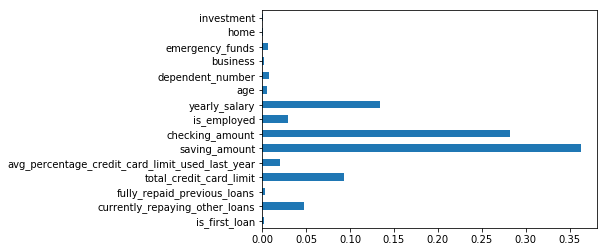

In [108]:
var_importancesunder = pd.Series(model1.feature_importances_, index=Xunder_train.columns)
#var_importances.nlargest(4).plot(kind='barh')
var_importancesunder.plot(kind='barh')
plt.show()

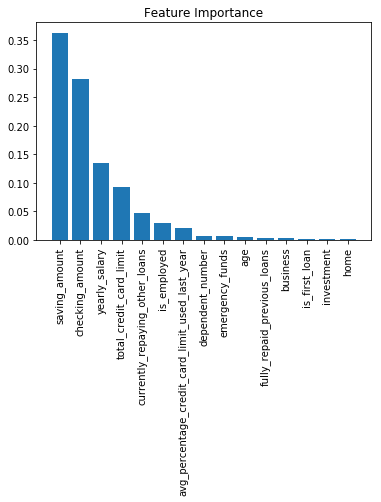

In [114]:
# Sort feature importances in descending order
indicesunder = np.argsort(model1.feature_importances_)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [Xunder_train.columns [i] for i in indicesunder]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(Xunder_train.shape[1]), model1.feature_importances_[indicesunder])

# Add feature names as x-axis labels
plt.xticks(range(Xunder_train.shape[1]), names, rotation=90)

# Show plot
plt.show()

In [115]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(yunder_test, ypredunder))

Accuracy: 0.9077555816686251


In [116]:
from sklearn.metrics import auc, roc_curve, classification_report
metrics.roc_auc_score(yunder_test, ypredunder)

0.9167261353312478

In [118]:
# Make predictions
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
train_trueu =yunder_train.values
test_trueu = yunder_test.values
train_predu= model1.predict(Xunder_train)
test_predu= model1.predict(Xunder_test)

train_fpru, train_tpru, _ = roc_curve(train_trueu, train_predu)
test_fpru, test_tpru, _ = roc_curve(test_trueu, test_predu)
train_aucu = np.round(auc(train_fpru, train_tpru), 3)
test_aucu = np.round(auc(test_fpru, test_tpru), 3)

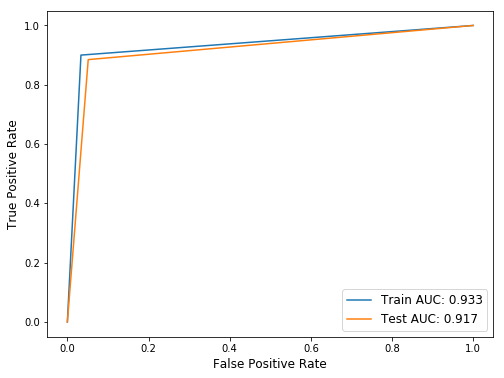

In [120]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(train_fpru, train_tpru, label='Train AUC: ' + str(train_aucu))
ax.plot(test_fpru, test_tpru, label='Test AUC: ' + str(test_aucu))
ax.set_xlabel('False Positive Rate', fontsize=12)
ax.set_ylabel('True Positive Rate', fontsize=12)
ax.legend(fontsize=12)
plt.show()


# random oversampling:

In [44]:
df_class_0_over = df_class_0.sample(df_class_1.loan_repaid.count(), replace=True)
print(df_class_0_over.loan_repaid.count())

df_test_over = pd.concat([df_class_0_over, df_class_1], axis=0)
print(df_class_1.loan_repaid.count())

print(df_test_over.loan_repaid.count())

print('Random under-sampling:')
print(df_test_over.loan_repaid.value_counts())



23018
23018
46036
Random under-sampling:
1.0    23018
0.0    23018
Name: loan_repaid, dtype: int64


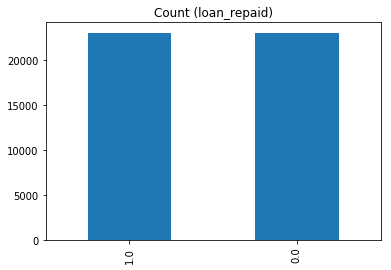

In [81]:
df_test_over.loan_repaid.value_counts().plot(kind='bar', title='Count (loan_repaid)');
plt.show()

In [46]:
#get dummies for over sampling data
df_test_overgetdummy=df_test_over
dummiesover=pd.get_dummies(df_test_overgetdummy.loan_purpose)
dummiesover.head()

,business,emergency_funds,home,investment,other
50208,0,1,0,0,0
32974,0,0,0,1,0
4596,0,0,0,1,0
66577,0,0,0,1,0
51331,1,0,0,0,0


In [47]:
#get dummies for test data
df_testtest_overgetdummy=df_test
dummiesovert=pd.get_dummies(df_testtest_overgetdummy.loan_purpose)
dummiesovert.head()

,business,emergency_funds,home,investment,other
17193,0,0,1,0,0
42974,0,0,1,0,0
82375,0,1,0,0,0
44867,0,0,0,1,0
31097,0,0,0,0,1


In [48]:
overcombinedummy=pd.concat([df_test_overgetdummy,dummiesover],axis='columns')
overcombinedummy.head()
overcombinedummyt=pd.concat([df_testtest_overgetdummy,dummiesovert],axis='columns')
overcombinedummyt.head()

,loan_purpose,loan_repaid,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number,business,emergency_funds,home,investment,other
17193,home,1.0,1,-1.0,-1.0,4000,0.75,6487,1706,1,28200,35,2,0,0,1,0,0
42974,home,1.0,0,1.0,1.0,4500,0.51,5172,1253,1,25700,48,8,0,0,1,0,0
82375,emergency_funds,0.0,0,1.0,1.0,5100,0.74,717,3730,1,32300,73,6,0,1,0,0,0
44867,investment,0.0,0,1.0,0.0,0,0.71,1355,1549,1,24500,37,2,0,0,0,1,0
31097,other,1.0,0,1.0,0.0,5100,0.62,28,2293,1,29000,18,4,0,0,0,0,1


In [49]:
#you can drop any dummies varible, because we just need n-1 dummies variables.
finaloversamplingdummy=overcombinedummy.drop(['loan_purpose','other'],axis='columns')
finaloversamplingdummy.head()
finaloversamplingdummyt=overcombinedummyt.drop(['loan_purpose','other'],axis='columns')
finaloversamplingdummyt.head()

,loan_repaid,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number,business,emergency_funds,home,investment
17193,1.0,1,-1.0,-1.0,4000,0.75,6487,1706,1,28200,35,2,0,0,1,0
42974,1.0,0,1.0,1.0,4500,0.51,5172,1253,1,25700,48,8,0,0,1,0
82375,0.0,0,1.0,1.0,5100,0.74,717,3730,1,32300,73,6,0,1,0,0
44867,0.0,0,1.0,0.0,0,0.71,1355,1549,1,24500,37,2,0,0,0,1
31097,1.0,0,1.0,0.0,5100,0.62,28,2293,1,29000,18,4,0,0,0,0


In [51]:
Xover_train=finaloversamplingdummy[['is_first_loan', 'currently_repaying_other_loans','fully_repaid_previous_loans',  
           'total_credit_card_limit','avg_percentage_credit_card_limit_used_last_year','saving_amount','checking_amount', 
          'is_employed','yearly_salary','age','dependent_number','business','emergency_funds','home','investment']]
 # Features
yover_train=finaloversamplingdummy['loan_repaid'] 
Xover_test=finaloversamplingdummyt[['is_first_loan', 'currently_repaying_other_loans','fully_repaid_previous_loans',  
           'total_credit_card_limit','avg_percentage_credit_card_limit_used_last_year','saving_amount','checking_amount', 
          'is_employed','yearly_salary','age','dependent_number','business','emergency_funds','home','investment']]
 # Features
yover_test=finaloversamplingdummyt['loan_repaid'] 

# Find best parameters using GridSearchCV and fit the model

In [52]:
%matplotlib inline
import numpy as np
import pandas as pd
#import visuals as vs
#from lime import lime_tabular
#import shap

from sklearn.utils import shuffle, class_weight
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
import seaborn as sns

random_state = 6
np.random.seed(random_state)

In [53]:
#Use Ensemble Cross-Validation (CV):
from sklearn.model_selection import *
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
cv1 = StratifiedKFold(n_splits=10, shuffle=True, random_state=random_state)
rfc1= RandomForestClassifier(criterion='entropy', random_state = random_state, class_weight='balanced')
params = {
    'n_estimators': [10, 20, 50, 100],
    'max_depth': [3, 4, 5, 7, 10],
    'min_samples_split': [40, 50, 60, 70]
}

grid_clf1 = GridSearchCV(estimator = rfc1, param_grid = params, scoring = 'accuracy', cv = cv1)

# we have to find out best optimized parameters
grid_clf1.fit(Xover_train, yover_train.astype(int))

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=6, shuffle=True),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=6,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 20, 50, 100], 'max_depth': [3, 4, 5, 7, 10], 'min_samples_split': [40, 50, 60, 70]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

# Print the best parameters and model estimator¶

In [54]:
# get the best model
print('\n # Best estimator ---------\n{}'.format(grid_clf1.best_estimator_))

# Get the best parameters
print('\n # Best parameters ---------\n{}'.format(grid_clf1.best_params_))

# best score
print('\n # Best score ---------\n{}'.format(grid_clf1.best_score_))


 # Best estimator ---------
RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=10, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=40, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=6,
            verbose=0, warm_start=False)

 # Best parameters ---------
{'max_depth': 10, 'min_samples_split': 40, 'n_estimators': 100}

 # Best score ---------
0.927708749674168


# Prediction on the estimator with the best found parameters.

In [55]:
ypredover = grid_clf1.predict(Xover_test)

In [56]:
print('The accuracy of the model is {}'.format(accuracy_score(yover_test, ypredover)))
print('# Classification report \n {}'.format(classification_report(yover_test, ypredover)))

The accuracy of the model is 0.9154775893906328
# Classification report 
              precision    recall  f1-score   support

        0.0       0.83      0.95      0.89      4226
        1.0       0.97      0.90      0.93      7688

avg / total       0.92      0.92      0.92     11914



# Confusion matrix


In [58]:
confusion_matrix(ypredover, yover_test)

array([[4022,  803],
       [ 204, 6885]], dtype=int64)

# Get the important features

In [59]:
model2 = RandomForestClassifier(bootstrap=True, class_weight = 'balanced',
            criterion='entropy', max_depth=10, max_features = 'auto',
            max_leaf_nodes=None, min_impurity_split = 1e-07,
            min_samples_leaf=1, min_samples_split = 40,
            min_weight_fraction_leaf = 0.0, n_estimators = 100, n_jobs=1,
            oob_score=False, random_state = random_state)

model2.fit(Xover_train, yover_train.astype(int))
importancesover= model2.feature_importances_
print(importancesover)

C:\Users\wenfe\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\wenfe\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\wenfe\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\wenfe\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\wenfe\Anaconda3

C:\Users\wenfe\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\wenfe\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\wenfe\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\wenfe\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\wenfe\Anaconda3

C:\Users\wenfe\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\wenfe\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\wenfe\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\wenfe\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\wenfe\Anaconda3

[0.00174439 0.04711789 0.00336197 0.08650911 0.0217344  0.37305768
 0.2881925  0.0300817  0.12400026 0.00549106 0.00722825 0.00219167
 0.00713447 0.00066307 0.00149156]


C:\Users\wenfe\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\wenfe\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


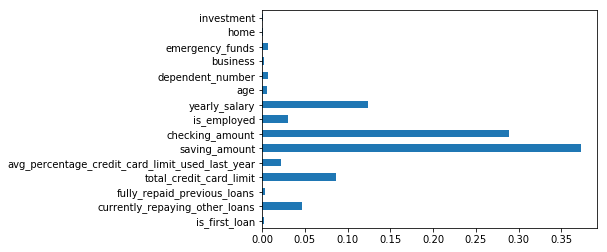

In [60]:
var_importancesover = pd.Series(model2.feature_importances_, index=Xover_train.columns)
#var_importances.nlargest(4).plot(kind='barh')
var_importancesover.plot(kind='barh')
plt.show()

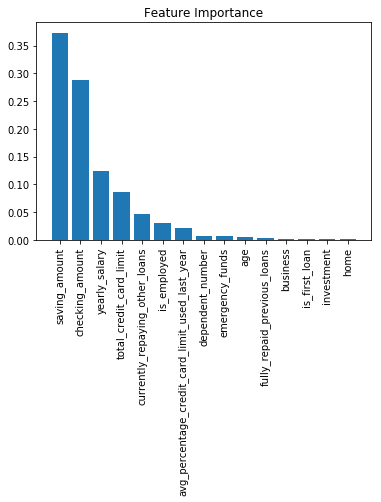

In [61]:
# Sort feature importances in descending order
indicesover = np.argsort(model2.feature_importances_)[::-1]

# Rearrange feature names so they match the sorted feature importances
names1 = [Xover_train.columns [i] for i in indicesover]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(Xover_train.shape[1]), model2.feature_importances_[indicesover])

# Add feature names as x-axis labels
plt.xticks(range(Xover_train.shape[1]), names1, rotation=90)

# Show plot
plt.show()

In [62]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(yover_test, ypredover))

Accuracy: 0.9154775893906328


In [63]:
from sklearn.metrics import auc, roc_curve, classification_report
metrics.roc_auc_score(yover_test, ypredover)

0.9236394553216719

In [64]:
# Make predictions
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
train_trueo =yover_train.values
test_trueo = yover_test.values
train_predo= model2.predict(Xover_train)
test_predo= model2.predict(Xover_test)

train_fpro, train_tpro, _ = roc_curve(train_trueo, train_predo)
test_fpro, test_tpro, _ = roc_curve(test_trueo, test_predo)
train_auco = np.round(auc(train_fpro, train_tpro), 3)
test_auco = np.round(auc(test_fpro, test_tpro), 3)

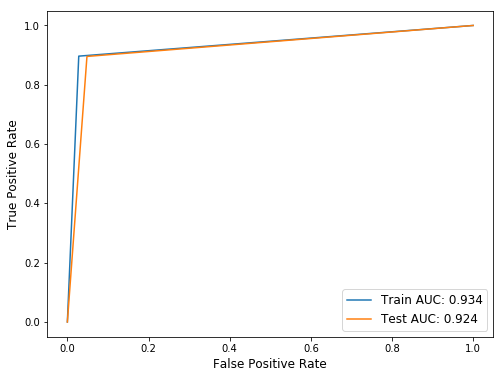

In [65]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(train_fpro, train_tpro, label='Train AUC: ' + str(train_auco))
ax.plot(test_fpro, test_tpro, label='Test AUC: ' + str(test_auco))
ax.set_xlabel('False Positive Rate', fontsize=12)
ax.set_ylabel('True Positive Rate', fontsize=12)
ax.legend(fontsize=12)
plt.show()


# smote

By oversampling only on the training data, none of the information in the validation data is being used to create synthetic observations. 

In [106]:
loanborrower2s=loanborrower2

In [107]:
import numpy as np
# Import train_test_split function
from sklearn.model_selection import train_test_split

Xs=loanborrower2s
#[['is_first_loan', 'currently_repaying_other_loans','fully_repaid_previous_loans',  
           #'total_credit_card_limit','avg_percentage_credit_card_limit_used_last_year','saving_amount','checking_amount', 
          #'is_employed','yearly_salary','age','dependent_number','loan_purpose']]
 # Features
ys=loanborrower2s['loan_repaid'].to_frame()  # Labels

# Split dataset into training set and test set
df_trains, df_tests = train_test_split(Xs, test_size=0.25,random_state=0)

In [108]:
df_trains.head()

,loan_purpose,loan_repaid,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number
34785,business,1.0,0,1.0,0.0,4800,0.79,3115,3947,1,55700,43,2
82345,emergency_funds,1.0,0,1.0,0.0,4300,0.69,4673,3766,1,14900,26,4
79762,investment,0.0,1,-1.0,-1.0,2800,0.85,1264,1894,1,35300,31,8
44804,home,1.0,1,-1.0,-1.0,6300,0.86,2090,3577,1,40500,21,1
65937,business,1.0,1,-1.0,-1.0,2600,0.56,1823,201,1,31600,28,5


In [115]:
Xso_train=df_trains[['loan_purpose','is_first_loan','fully_repaid_previous_loans' ,'currently_repaying_other_loans', 
           'total_credit_card_limit','avg_percentage_credit_card_limit_used_last_year','saving_amount','checking_amount', 
          'is_employed','yearly_salary','age','dependent_number']]
yso_train=df_trains['loan_repaid'].to_frame()
Xso_test=df_tests[['loan_purpose','is_first_loan','fully_repaid_previous_loans' ,'currently_repaying_other_loans', 
           'total_credit_card_limit','avg_percentage_credit_card_limit_used_last_year','saving_amount','checking_amount', 
          'is_employed','yearly_salary','age','dependent_number']]
yso_test=df_tests['loan_repaid'].to_frame()

In [130]:
print("Number transactions Xs_train dataset: ", Xso_train.shape)
print("Number transactions ys_train dataset: ", yso_train.shape)
print("Number transactions Xs_test dataset: ", Xso_test.shape)
print("Number transactions ys_test dataset: ", yso_test.shape)

Number transactions Xs_train dataset:  (35740, 12)
Number transactions ys_train dataset:  (35740, 1)
Number transactions Xs_test dataset:  (11914, 12)
Number transactions ys_test dataset:  (11914, 1)


In [153]:
#get dummies
df_test_sgetdummy=df_trains
dummiesso=pd.get_dummies(df_test_sgetdummy.loan_purpose)
dummiesso.head()

,business,emergency_funds,home,investment,other
34785,1,0,0,0,0
82345,0,1,0,0,0
79762,0,0,0,1,0
44804,0,0,1,0,0
65937,1,0,0,0,0


In [155]:
df_testtest_sgetdummy=df_test
dummiest=pd.get_dummies(df_testtest_sgetdummy.loan_purpose)
dummiest.head()

,business,emergency_funds,home,investment,other
24062,0,0,0,1,0
22110,0,0,0,1,0
97733,0,0,1,0,0
24065,0,0,1,0,0
91822,1,0,0,0,0


In [156]:
scombinedummy=pd.concat([df_test_sgetdummy,dummiesso],axis='columns')
scombinedummy.head()
scombinedummyt=pd.concat([df_testtest_sgetdummy,dummiest],axis='columns')
scombinedummyt.head()

,loan_purpose,loan_repaid,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number,business,emergency_funds,home,investment,other
24062,investment,1.0,1,-1.0,-1.0,9400,0.77,1552,5119,1,0,68,5,0,0,0,1,0
22110,investment,1.0,1,-1.0,-1.0,4800,0.83,6436,302,1,76000,44,8,0,0,0,1,0
97733,home,1.0,0,1.0,1.0,6400,0.68,3230,11786,1,13000,52,3,0,0,1,0,0
24065,home,1.0,1,-1.0,-1.0,2800,0.65,743,5774,1,13800,61,1,0,0,1,0,0
91822,business,0.0,0,1.0,1.0,3400,0.82,613,811,1,17800,22,5,1,0,0,0,0


In [157]:
#you can drop any dummies varible, because we just need n-1 dummies variables.
finalssamplingdummy=scombinedummy.drop(['loan_purpose','other'],axis='columns')
finalssamplingdummy.head()
finalssamplingdummyt=scombinedummyt.drop(['loan_purpose','other'],axis='columns')
finalssamplingdummyt.head()

,loan_repaid,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number,business,emergency_funds,home,investment
24062,1.0,1,-1.0,-1.0,9400,0.77,1552,5119,1,0,68,5,0,0,0,1
22110,1.0,1,-1.0,-1.0,4800,0.83,6436,302,1,76000,44,8,0,0,0,1
97733,1.0,0,1.0,1.0,6400,0.68,3230,11786,1,13000,52,3,0,0,1,0
24065,1.0,1,-1.0,-1.0,2800,0.65,743,5774,1,13800,61,1,0,0,1,0
91822,0.0,0,1.0,1.0,3400,0.82,613,811,1,17800,22,5,1,0,0,0


In [166]:
Xsomt_train=finalssamplingdummy[['is_first_loan', 'currently_repaying_other_loans','fully_repaid_previous_loans',  
           'total_credit_card_limit','avg_percentage_credit_card_limit_used_last_year','saving_amount','checking_amount', 
          'is_employed','yearly_salary','age','dependent_number','business','emergency_funds','home','investment']]
 # Features
ysomt_train=finalssamplingdummy['loan_repaid']
Xsomt_test=finalssamplingdummyt[['is_first_loan', 'currently_repaying_other_loans','fully_repaid_previous_loans',  
           'total_credit_card_limit','avg_percentage_credit_card_limit_used_last_year','saving_amount','checking_amount', 
          'is_employed','yearly_salary','age','dependent_number','business','emergency_funds','home','investment']]
 # Features
ysomt_test=finalssamplingdummyt['loan_repaid']

In [252]:
ysomt_train.head()

34785    1.0
82345    1.0
79762    0.0
44804    1.0
65937    1.0
Name: loan_repaid, dtype: float64

In [253]:
type(ysomt_train)

pandas.core.series.Series

In [167]:
from imblearn.over_sampling import SMOTE

In [168]:
type(Xsomt_train)

pandas.core.frame.DataFrame

In [171]:
# applying SMOTE to our data and checking the class counts
smt = SMOTE()
Xsomte_train, ysomte_train = smt.fit_sample(Xsomt_train, ysomt_train)

In [172]:
#let us check the amount of records in each category
np.bincount(ysomte_train.astype(int))

array([22975, 22975], dtype=int64)

In [254]:
type(Xsomte_train)

numpy.ndarray

# Find best parameters using GridSearchCV and fit the model


In [175]:
%matplotlib inline
import numpy as np
import pandas as pd
#import visuals as vs
#from lime import lime_tabular
#import shap

from sklearn.utils import shuffle, class_weight
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
import seaborn as sns

random_state = 6
np.random.seed(random_state)

In [177]:
#Use Ensemble Cross-Validation (CV):
from sklearn.model_selection import *
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
cvs = StratifiedKFold(n_splits=10, shuffle=True, random_state=random_state)
rfcs = RandomForestClassifier(criterion='entropy', random_state = random_state, class_weight='balanced')
params = {
    'n_estimators': [10, 20, 50, 100],
    'max_depth': [3, 4, 5, 7, 10],
    'min_samples_split': [40, 50, 60, 70]
}

grid_clfs = GridSearchCV(estimator = rfcs, param_grid = params, scoring = 'accuracy', cv = cvs)

# we have to find out best optimized parameters
grid_clfs.fit(Xsomte_train, ysomte_train.astype(int))

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=6, shuffle=True),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=6,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 20, 50, 100], 'max_depth': [3, 4, 5, 7, 10], 'min_samples_split': [40, 50, 60, 70]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

# Print the best parameters and model estimator

In [178]:
# get the best model
print('\n # Best estimator ---------\n{}'.format(grid_clfs.best_estimator_))

# Get the best parameters
print('\n # Best parameters ---------\n{}'.format(grid_clfs.best_params_))

# best score
print('\n # Best score ---------\n{}'.format(grid_clfs.best_score_))


 # Best estimator ---------
RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=10, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=40, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=6,
            verbose=0, warm_start=False)

 # Best parameters ---------
{'max_depth': 10, 'min_samples_split': 40, 'n_estimators': 100}

 # Best score ---------
0.9333841131664853


# Prediction on the estimator with the best found parameters.

In [180]:
ypredsmote = grid_clfs.predict(Xsomt_test)

In [182]:
print('The accuracy of the model is {}'.format(accuracy_score(ysomt_test, ypredsmote)))
print('# Classification report \n {}'.format(classification_report(ysomt_test, ypredsmote)))

The accuracy of the model is 0.923703206311902
# Classification report 
              precision    recall  f1-score   support

        0.0       0.85      0.95      0.90      4283
        1.0       0.97      0.91      0.94      7631

avg / total       0.93      0.92      0.92     11914



# Confusion matrix

In [184]:
confusion_matrix(ypredsmote, ysomt_test)

array([[4070,  696],
       [ 213, 6935]], dtype=int64)

# Get the important features

In [185]:
models= RandomForestClassifier(bootstrap=True, class_weight = 'balanced',
            criterion='entropy', max_depth=10, max_features = 'auto',
            max_leaf_nodes=None, min_impurity_split = 1e-07,
            min_samples_leaf=1, min_samples_split = 40,
            min_weight_fraction_leaf = 0.0, n_estimators = 100, n_jobs=1,
            oob_score=False, random_state = random_state)

models.fit(Xsomte_train, ysomte_train.astype(int))
importancessomte= models.feature_importances_
print(importancessomte)

C:\Users\wenfe\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\wenfe\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\wenfe\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\wenfe\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\wenfe\Anaconda3

C:\Users\wenfe\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\wenfe\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\wenfe\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\wenfe\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\wenfe\Anaconda3

C:\Users\wenfe\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\wenfe\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\wenfe\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\wenfe\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\wenfe\Anaconda3

[0.01604695 0.0625839  0.01394122 0.07789113 0.01773918 0.34862077
 0.26512019 0.02425755 0.11774765 0.00319278 0.01084267 0.00985354
 0.023328   0.0038447  0.00498979]


C:\Users\wenfe\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)
C:\Users\wenfe\Anaconda3\lib\site-packages\sklearn\tree\tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


In [197]:
#convert the np array to dataframe
dfss_train=pd.DataFrame(data=Xsomte_train[0:,0:],
                index=[i for i in range(Xsomte_train.shape[0])],
     columns=[j for j in Xsomt_train.columns])
dfss_train.head()

,is_first_loan,currently_repaying_other_loans,fully_repaid_previous_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number,business,emergency_funds,home,investment
0,0.0,0.0,1.0,4800.0,0.79,3115.0,3947.0,1.0,55700.0,43.0,2.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,4300.0,0.69,4673.0,3766.0,1.0,14900.0,26.0,4.0,0.0,1.0,0.0,0.0
2,1.0,-1.0,-1.0,2800.0,0.85,1264.0,1894.0,1.0,35300.0,31.0,8.0,0.0,0.0,0.0,1.0
3,1.0,-1.0,-1.0,6300.0,0.86,2090.0,3577.0,1.0,40500.0,21.0,1.0,0.0,0.0,1.0,0.0
4,1.0,-1.0,-1.0,2600.0,0.56,1823.0,201.0,1.0,31600.0,28.0,5.0,1.0,0.0,0.0,0.0


In [255]:
#convert the np array to dataframe
dfssy_train=pd.DataFrame(data=ysomte_train[0:],
               # index=[i for i in range(ysomte_train.shape[0])],
     columns=['loan_repaid'])
dfssy_train.head()

,loan_repaid
0,1.0
1,1.0
2,0.0
3,1.0
4,1.0


In [256]:
type(dfssy_train)

pandas.core.frame.DataFrame

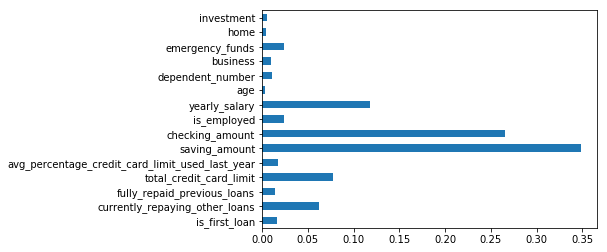

In [198]:
var_importancessomte = pd.Series(models.feature_importances_, index=dfss_train.columns)
#var_importances.nlargest(4).plot(kind='barh')
var_importancessomte.plot(kind='barh')
plt.show()

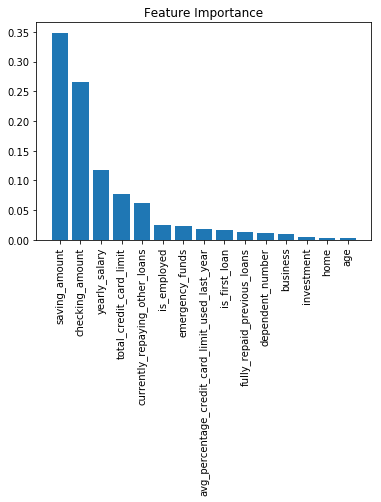

In [199]:
# Sort feature importances in descending order
indicessm = np.argsort(models.feature_importances_)[::-1]

# Rearrange feature names so they match the sorted feature importances
namesm = [dfss_train.columns [i] for i in indicessm]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(dfss_train.shape[1]), models.feature_importances_[indicessm])

# Add feature names as x-axis labels
plt.xticks(range(dfss_train.shape[1]), namesm, rotation=90)

# Show plot
plt.show()

In [200]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(ysomt_test, ypredsmote))

Accuracy: 0.923703206311902


In [233]:
from sklearn.metrics import auc, roc_curve, classification_report
metrics.roc_auc_score(ysomt_test, ypredsmote)

0.9295307921199434

In [261]:
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

In [239]:
# predict probabilities
probss = models.predict_proba(Xsomt_test)
# keep probabilities for the positive outcome only
probss= probss[:, 1]
# calculate AUC
aucs = roc_auc_score(ysomt_test, probss)
print('AUC: %.3f' % aucs)
# calculate roc curve

AUC: 0.979


In [245]:
# predict probabilities
probstra = models.predict_proba(Xsomte_train)
# keep probabilities for the positive outcome only
probstra= probstra[:, 1]
# calculate AUC
aucstr = roc_auc_score(ysomte_train, probstra)
print('AUC: %.3f' % aucstr)
# calculate roc curve
#ysomte_train

AUC: 0.987


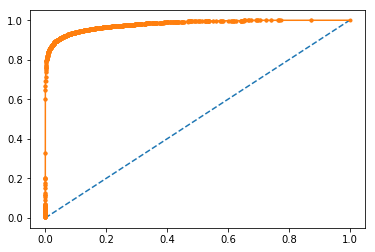

In [240]:
fprss1, tprss1, thresholds = roc_curve(ysomt_test, probss)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fprss1, tprss1, marker='.')
# show the plot
plt.show()

In [230]:
# Make predictions
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
train_trues =dfss_train.values
print(type(train_trues))
print(train_trues.astype(int).dtype)
print(train_trues)

<class 'numpy.ndarray'>
int32
[[ 0.          0.          1.         ...  0.          0.
   0.        ]
 [ 0.          0.          1.         ...  1.          0.
   0.        ]
 [ 1.         -1.         -1.         ...  0.          0.
   1.        ]
 ...
 [ 0.95540173 -0.91080346 -0.95540173 ...  0.          0.
   0.        ]
 [ 1.         -1.         -1.         ...  0.54539945  0.45460055
   0.        ]
 [ 0.          1.          1.         ...  0.03773323  0.
   0.96226677]]


In [231]:
train_preds

array([1, 1, 0, ..., 0, 0, 0])

In [207]:
test_trues = ysomt_test.values
type(train_preds)

In [227]:
train_preds= models.predict(dfss_train)
print(type(train_preds))
print(train_preds.astype(float).dtype)

<class 'numpy.ndarray'>
float64


In [215]:
test_preds= models.predict(Xsomt_test)
type(train_preds)

numpy.ndarray

In [ ]:
from sklearn.metrics import roc_curve

#y_test = np.asarray([-10.54, -9.49, -9.4, -9.37, -9.36, -9.31, -9.28, -9.14, -9.11, -9.03, -9.01, -9.0, -8.99, -8.98, -8.96, -8.91, -8.9, -8.9, -8.9, -8.89, -8.88, -8.86, -8.86, -8.84, -8.83, -8.78, -8.76, -8.74, -8.74, -8.69, -8.69, -8.69, -8.67, -8.64, -8.61, -8.57, -8.51, -8.5, -8.49, -8.48, -8.4, -8.34, -8.33, -8.3, -8.29, -8.29, -8.27, -8.26, -8.25, -8.22, -8.15, -8.12, -8.1, -8.08, -8.04, -8.04, -7.96, -7.94, -7.94, -7.85, -7.83, -7.82, -7.82, -7.81, -7.76, -7.74, -7.71, -7.65, -7.57, -7.54, -7.47, -7.4, -7.39, -7.34, -7.33, -7.32, -7.27, -7.23, -7.16, -7.08, -7.05, -6.92, -6.9, -6.89, -6.86, -6.86, -6.83, -6.78, -6.73, -6.69, -6.59, -6.57, -6.4, -6.37, -6.21, -6.19, -6.16, -6.04, -6.04, -5.57, -5.54, -5.35, -5.24, -5.0, -4.92])
#probas = np.asarray([1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
fpr, tpr, thresholds = roc_curve(probas,y_test)
plt.plot(fpr, label = 'fpr')
plt.plot(tpr, label = 'tpr')
plt.legend(fontsize=16)

In [258]:

# Make predictions
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
train_truess1 =dfssy_train.values
test_truess1= ysomt_test.values
train_predss1= models.predict(dfss_train)
test_predss1= models.predict(Xsomt_test)

train_fprss1, train_tprss1, _ = roc_curve(train_truess1, train_predss1)
test_fprss1, test_tprss1, _ = roc_curve(test_truess1, test_predss1)
train_aucss1 = np.round(auc(train_fprss1, train_tprss1), 3)
test_aucss1 = np.round(auc(test_fprss1, test_tprss1), 3)

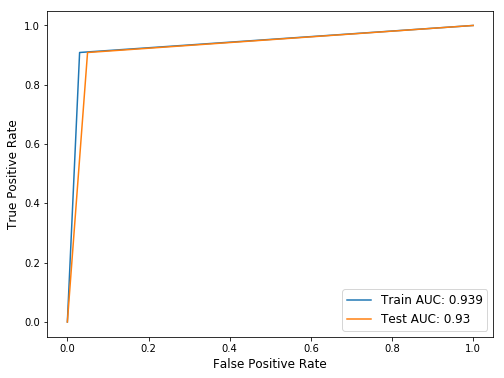

In [262]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(train_fprss1, train_tprss1, label='Train AUC: ' + str(train_aucss1))
ax.plot(test_fprss1, test_tprss1, label='Test AUC: ' + str(test_aucss1))
ax.set_xlabel('False Positive Rate', fontsize=12)
ax.set_ylabel('True Positive Rate', fontsize=12)
ax.legend(fontsize=12)
plt.show()


# Conclusion


In my model, saving_amount and checking_amount are the top two most important features.

For the is_employed, it is not very important in my current model. However, is_employed is directly related to salary. For people with no employment, their salary is 0. Since salary is also very important, we can conclude that is_employed is also important, but it is indirectly related to the model.

According to above plot, the most important feature is 'saving amount'. This makes perfect sense. Money in the saving account, meaure a person's ability to control his financial situation. More money in the saving account, more likely the borrower can repay.

As I mentioned, in my model, 'is_employed' is merged into feature 'salary', which correspond to the case 'salary=0'. according to above plot, salary is also a strong feature.

if not employed, then salary=0, which will impact negatively on 'grant decision'. that is very easy to understand, a person without any financial input, will be very unlikely to repay. but even the person is employed, whether grant the loan or not, depends on his salary. higher salary indicates strong ability to repay.

# other insights

Some useful feature which may include:

Housing status, has his/her own house, or rent appartments? if renting, how much is monthly rent? Because even the borrower cannot repay, if he/she has house, the house can be sold to repay the debt

Educational level Normally a person who received higher education, has stronger capability to earn money to repay, and has higher moral standard 